In [1]:
%%bash
if [ ! -d "DataSet" ] ; then 
    mkdir "DataSet"
    cd "DataSet"
    curl -O "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
fi

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  258k  100  258k    0     0   427k      0 --:--:-- --:--:-- --:--:--  428k


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("DataSet/winequality-white.csv",sep=";")
df.quality=pd.cut(df.quality,[0,4,6.9,10],labels=[1,2,3])

In [3]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
Normalizer=preprocessing.StandardScaler()

train,test=train_test_split(df,shuffle=True)
y_train=train.pop("quality")
x_train=train

y_test=test.pop("quality")
x_test=test





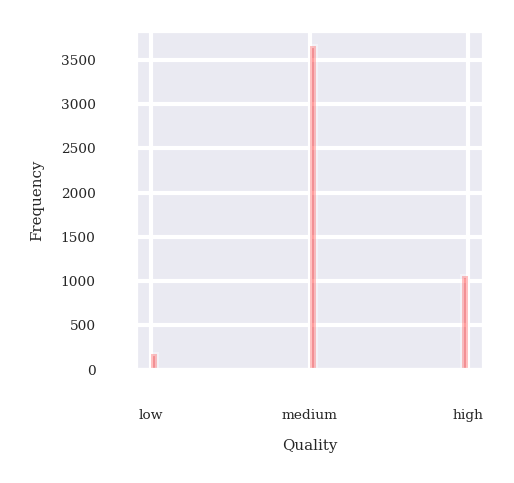

In [4]:
sns.set(font_scale=0.3,font="serif",rc=plt.rc('figure', dpi=300, figsize=(1.5, 1.5)))
sns.distplot(df.quality,kde=False, color='red',);
plt.xlabel("Quality");
plt.ylabel("Frequency");
plt.xticks([1,2,3],["low","medium","high"]);

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,VotingClassifier

model=RandomForestClassifier(n_estimators=10,max_depth=10).fit(x_train,y_train)


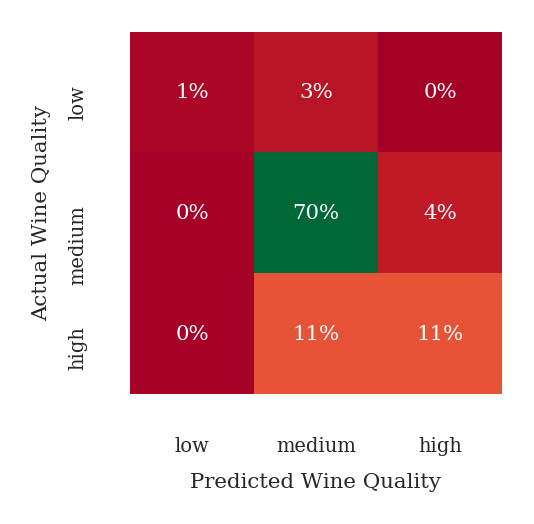

In [6]:
from sklearn.metrics import accuracy_score,confusion_matrix
conf=np.round(confusion_matrix(y_true=y_test,y_pred=model.predict(x_test))/len(x_test),2)
conf=pd.DataFrame(conf,columns=["low","medium","high"],index=["low","medium","high"])
sns.set(font_scale=0.4,font="serif",rc=plt.rc('figure', dpi=320, figsize=(1.5, 1.5)))
sns.heatmap(conf,cmap="RdYlGn",annot=True,fmt='.0%',cbar=False);
plt.xlabel("Predicted Wine Quality");
plt.ylabel("Actual Wine Quality");
